# Pre-Processing

## Set up

In [1]:
#load in the data
import sys
from google.colab import drive

## Import required packages for data manipulation and visualization, and curve fitting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
try:
  from fitter import Fitter, get_common_distributions, get_distributions
except:
  !pip install fitter
  from fitter import Fitter, get_common_distributions, get_distributions

#Fitter doc
#https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=6df64229529967c60789791452b3687e0ef57eee498014ec173c3767a0722d1c
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Capstone/ICR - Identifying Age-Related Conditions/data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Capstone/ICR - Identifying Age-Related Conditions/data/test.csv')

In [4]:
## Creating two new columns for probability value of class 0 and 1 from the original Class column

train_data['class_0'] = train_data['Class']
train_data['class_1'] = train_data['Class']
train_data['class_0'] = ((train_data['class_0'] - 1) * -1)

### make a cell here for integrating the Greeks dataset and include the splits
X_a, y_a -- y_a only class 0 and class a

X_b, y_b -- ""

X_c, y_c -- ""

In [5]:
train_data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FS,GB,GE,GF,GH,GI,GL,Class,class_0,class_1
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1,0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0,1,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,1,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,1,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1,0,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       617 non-null    object 
 1   AB       617 non-null    float64
 2   AF       617 non-null    float64
 3   AH       617 non-null    float64
 4   AM       617 non-null    float64
 5   AR       617 non-null    float64
 6   AX       617 non-null    float64
 7   AY       617 non-null    float64
 8   AZ       617 non-null    float64
 9   BC       617 non-null    float64
 10  BD       617 non-null    float64
 11  BN       617 non-null    float64
 12  BP       617 non-null    float64
 13  BQ       557 non-null    float64
 14  BR       617 non-null    float64
 15  BZ       617 non-null    float64
 16  CB       615 non-null    float64
 17  CC       614 non-null    float64
 18  CD       617 non-null    float64
 19  CF       617 non-null    float64
 20  CH       617 non-null    float64
 21  CL       617 non

In [7]:
## Creating two new columns for probability value of class 0 and 1 from the original Class column

train_data['class_0'] = train_data['Class']
train_data['class_1'] = train_data['Class']
train_data['class_0'] = ((train_data['class_0'] - 1) * -1)

In [8]:
# pip install autoviz

## Trying out EDA packages

In [9]:
# from pandas_profiling import ProfileReport

# #EDA using pandas-profiling
# #profile = ProfileReport(pd.read_csv('titanic.csv'), explorative=True)
# profile = ProfileReport(df, explorative=True)

# #Saving results to a HTML file
# profile.to_file("output.html")

In [10]:
# profile.to_file("output.html")

In [11]:
# df_class = df[['Class', 'AB', 'AF', 'AH', 'AM']]

# df_class = ProfileReport(df_class, explorative=True)

# df_class.to_file("output_class.html")

## Using Autoviz

In [12]:
# import pandas as pd
# from autoviz.AutoViz_Class import AutoViz_Class

# #EDA using Autoviz
# autoviz = AutoViz_Class().AutoViz('class.csv')

## Fill Missing Values / Imputing Values

In [13]:
missing_val_cols = [column for column, val in (train_data.isna().sum() != 0).items() if val]
print(f"Number of features with missing values: {len(missing_val_cols)}\n\n{missing_val_cols}")

Number of features with missing values: 9

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']


The above cell indicates that 9 features have missing values which need to be handled before training a model.

In [14]:
col_class_dict = dict()
for col in missing_val_cols:
    print(f"Feature {col} classwise missing values:")
    class_dict = (train_data[train_data[col].isna()].groupby('Class')['Class'].count()).to_dict()
    print(f"{class_dict}")
    col_class_dict[col] = class_dict

Feature BQ classwise missing values:
{0: 60}
Feature CB classwise missing values:
{0: 2}
Feature CC classwise missing values:
{0: 2, 1: 1}
Feature DU classwise missing values:
{0: 1}
Feature EL classwise missing values:
{0: 54, 1: 6}
Feature FC classwise missing values:
{1: 1}
Feature FL classwise missing values:
{0: 1}
Feature FS classwise missing values:
{0: 1, 1: 1}
Feature GL classwise missing values:
{0: 1}


The above cell gives an overview about the missing value count in each feature for a particular class.

### Imputing values based on highly correlated features

In [15]:
train_data.corrwith(train_data['EL']).sort_values(ascending=False)[1:10]

<ipython-input-15-6df375457673>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corrwith(train_data['EL']).sort_values(ascending=False)[1:10]


GL    0.314225
GE    0.186231
CU    0.140361
FE    0.134647
GI    0.126628
DI    0.123333
AZ    0.118017
AF    0.114897
AX    0.112591
dtype: float64

The feature with the highest correlation with *EL* is *GL* with a corr. value of 0.314. This value is too low for us to directly impute missing values in EL with scaled values from GL.

### Imputing values based on mean/median values

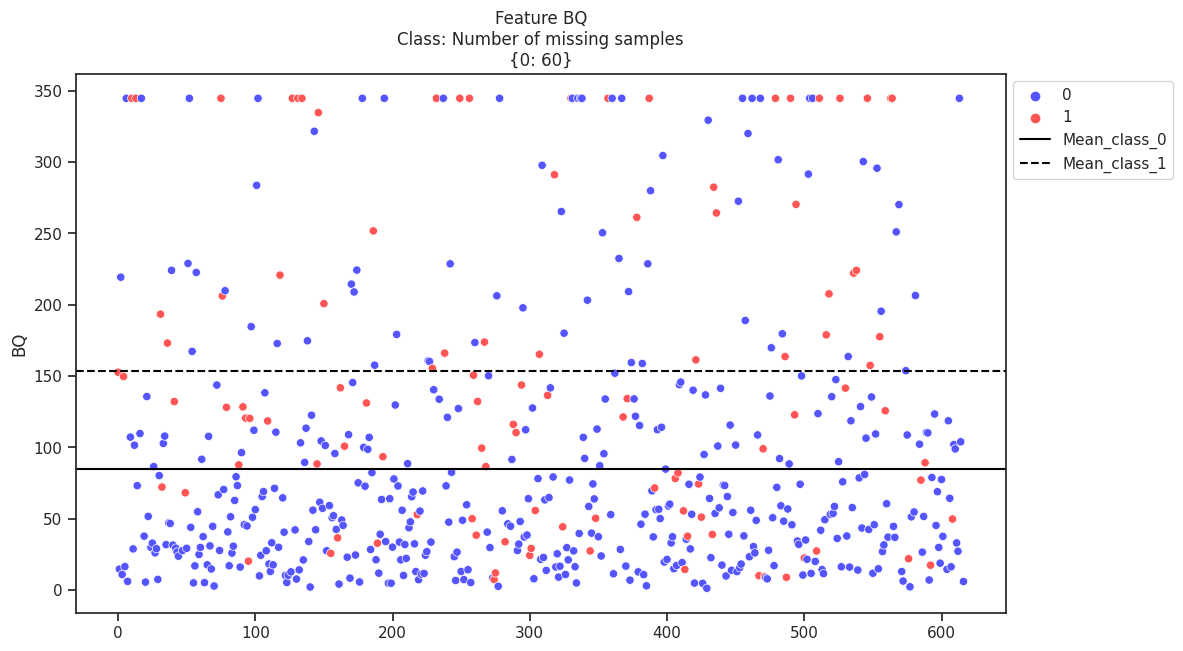

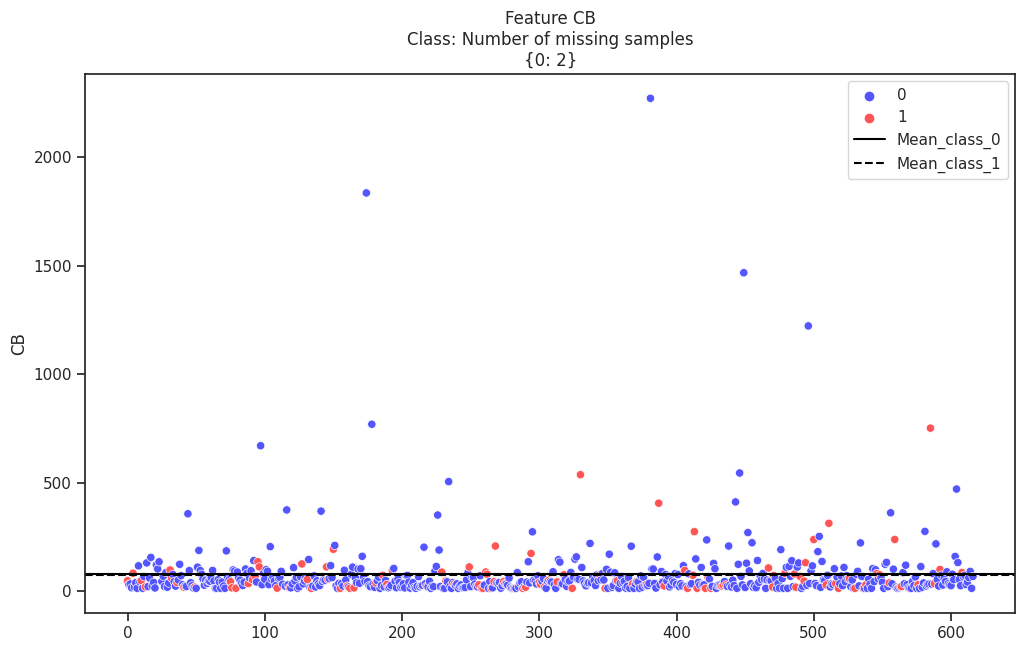

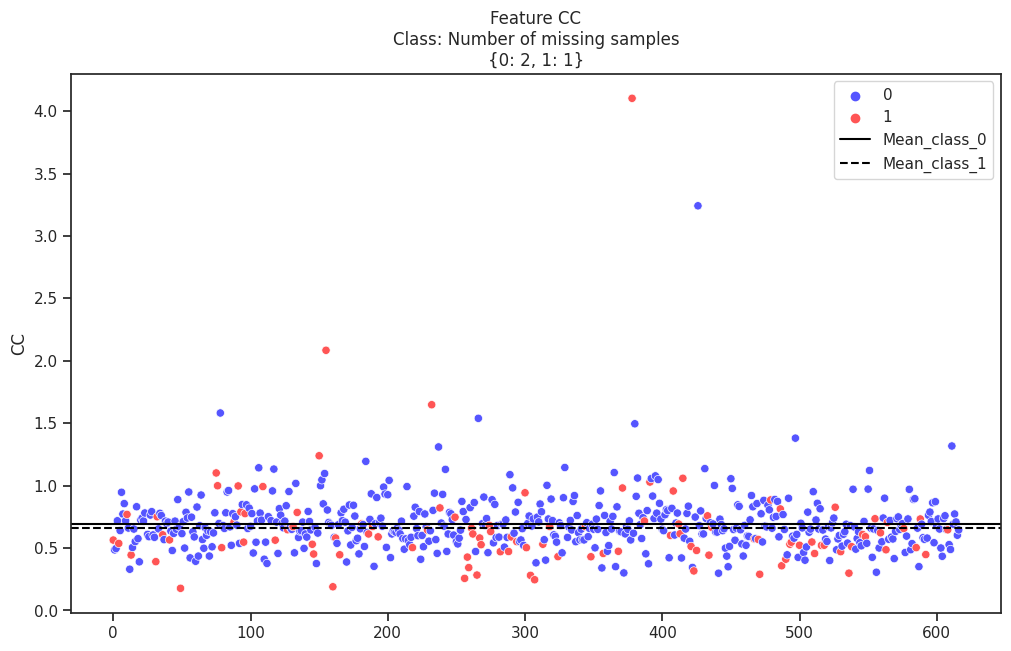

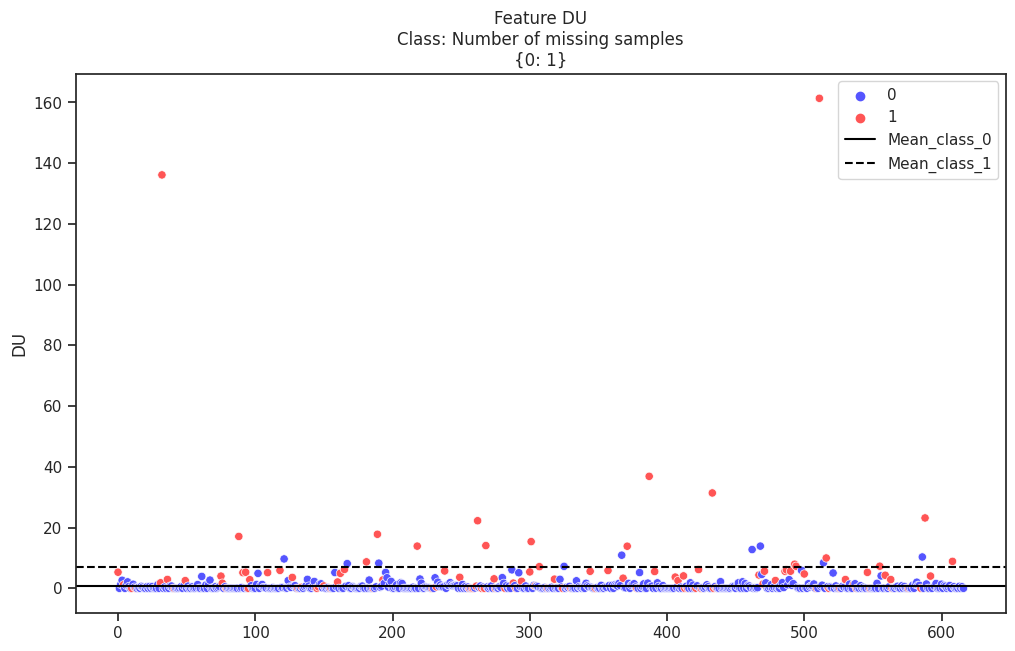

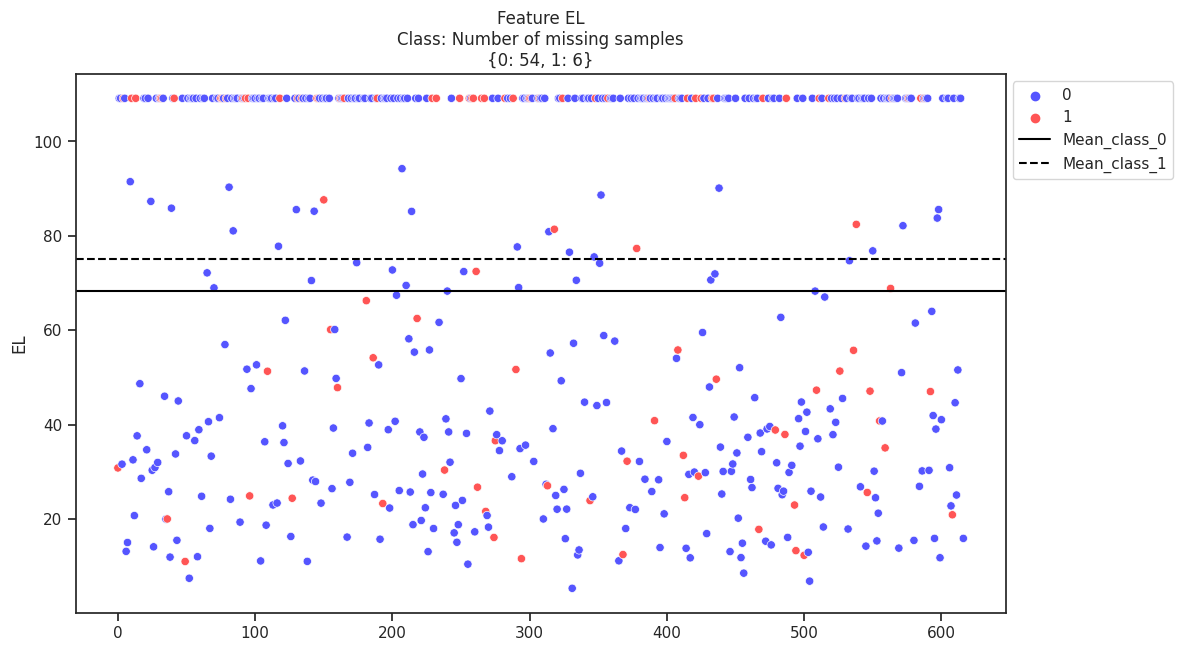

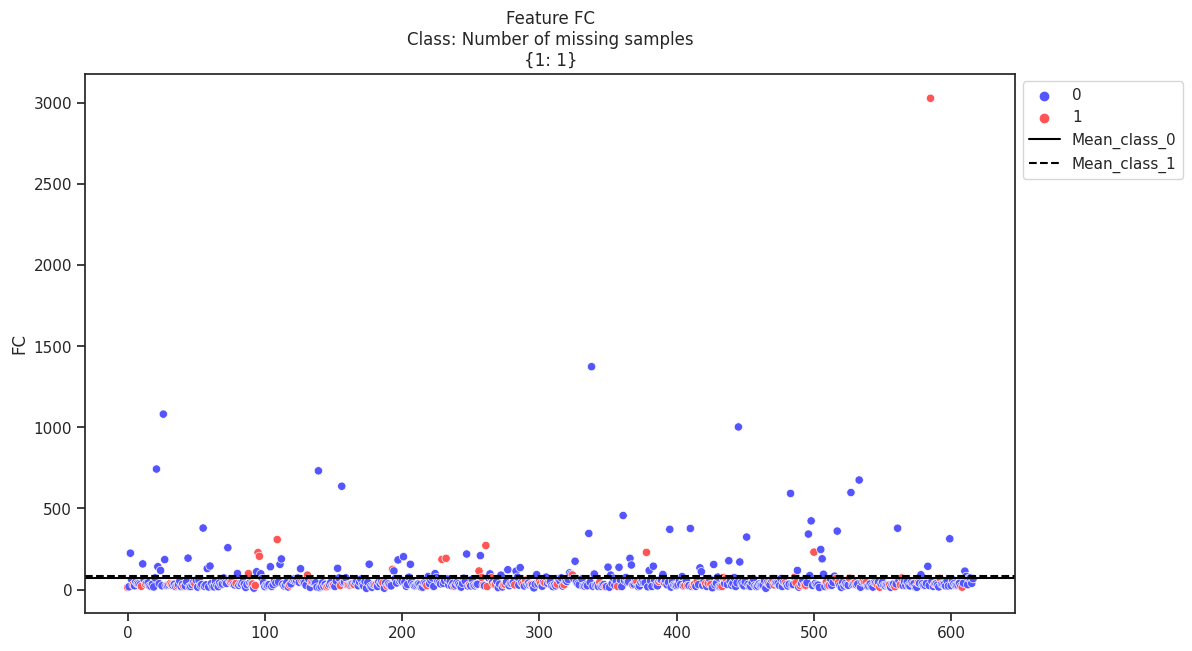

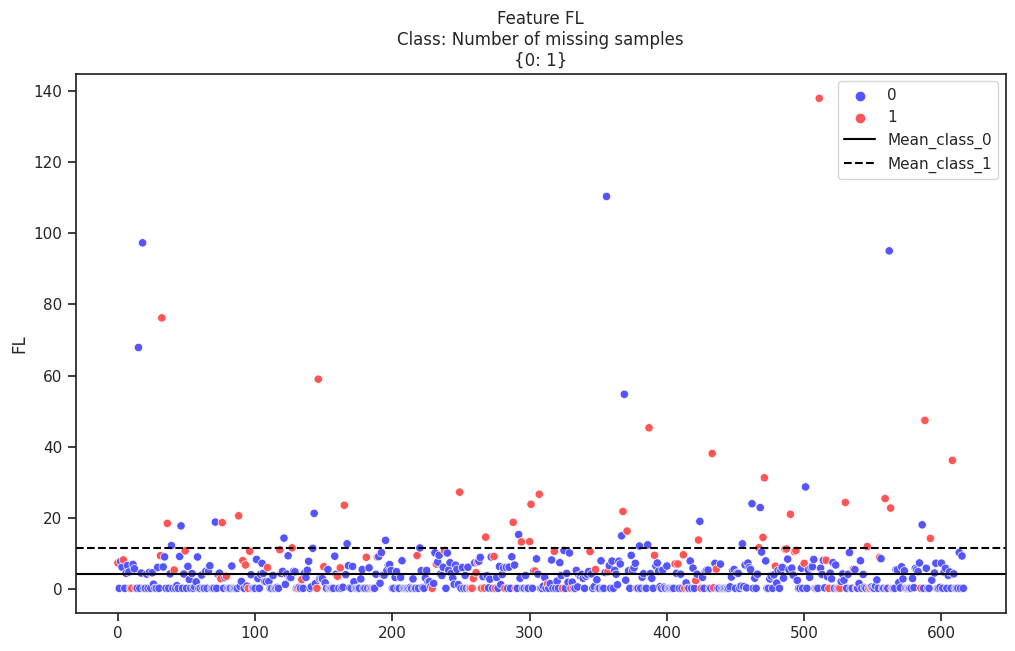

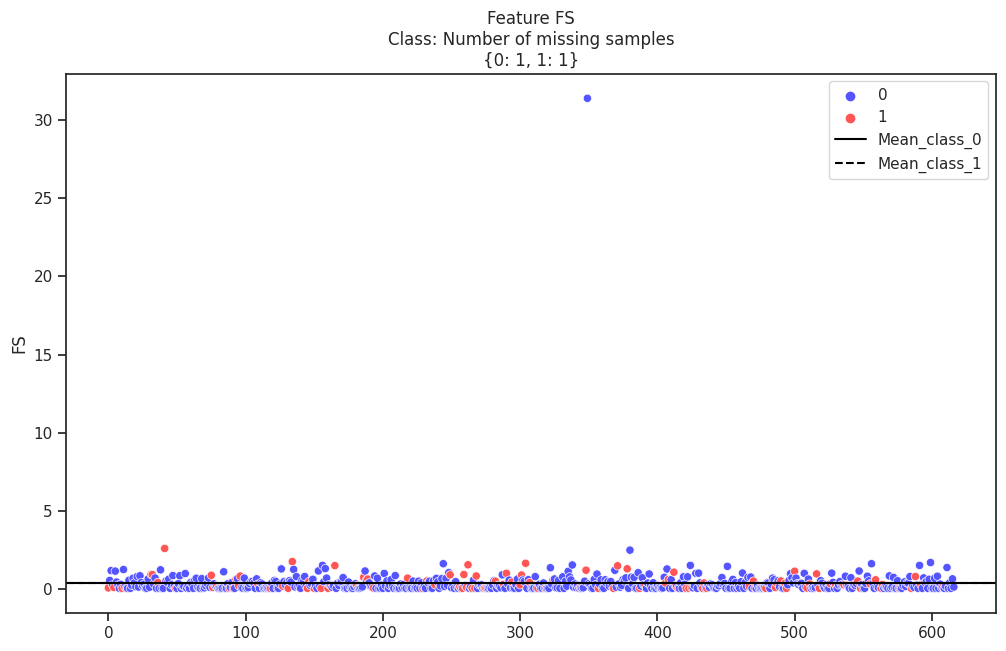

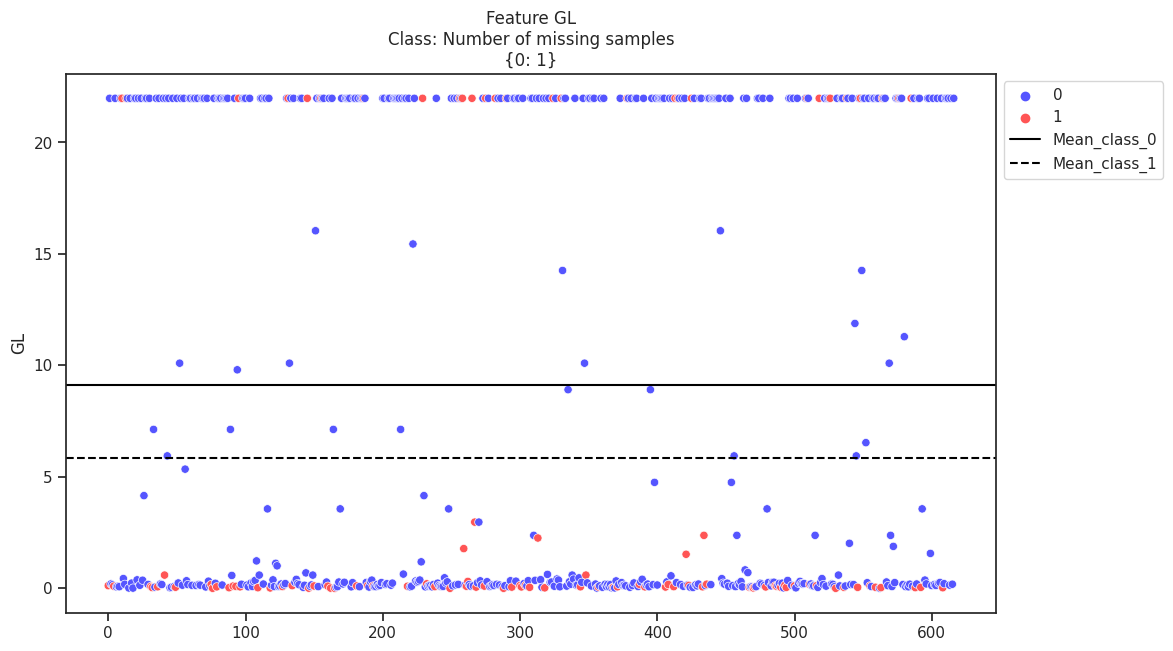

In [16]:
for col in missing_val_cols:
    sns.set(rc={'figure.figsize': (12,7)})
    sns.set_style("ticks")
    sns.scatterplot(data=train_data, x=train_data.index, y=col, hue='Class', palette='seismic')
    plt.axhline(y=np.nanmean(train_data[train_data.Class == 0][col]), color='black', label='Mean_class_0')
    plt.axhline(y=np.nanmean(train_data[train_data.Class == 1][col]), color='black', \
                linestyle='dashed',label='Mean_class_1')
    plt.title(f"Feature {col}\nClass: Number of missing samples\n{col_class_dict[col]}")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

The problem with imputing a fixed mean value in a feature series is that certain features (ex. EL, class 0) have a bimodal distribution. This will cause incorrect imputation and might change the distribution of the data.

### Imputing based on histogram/getting values from a fitted distribution

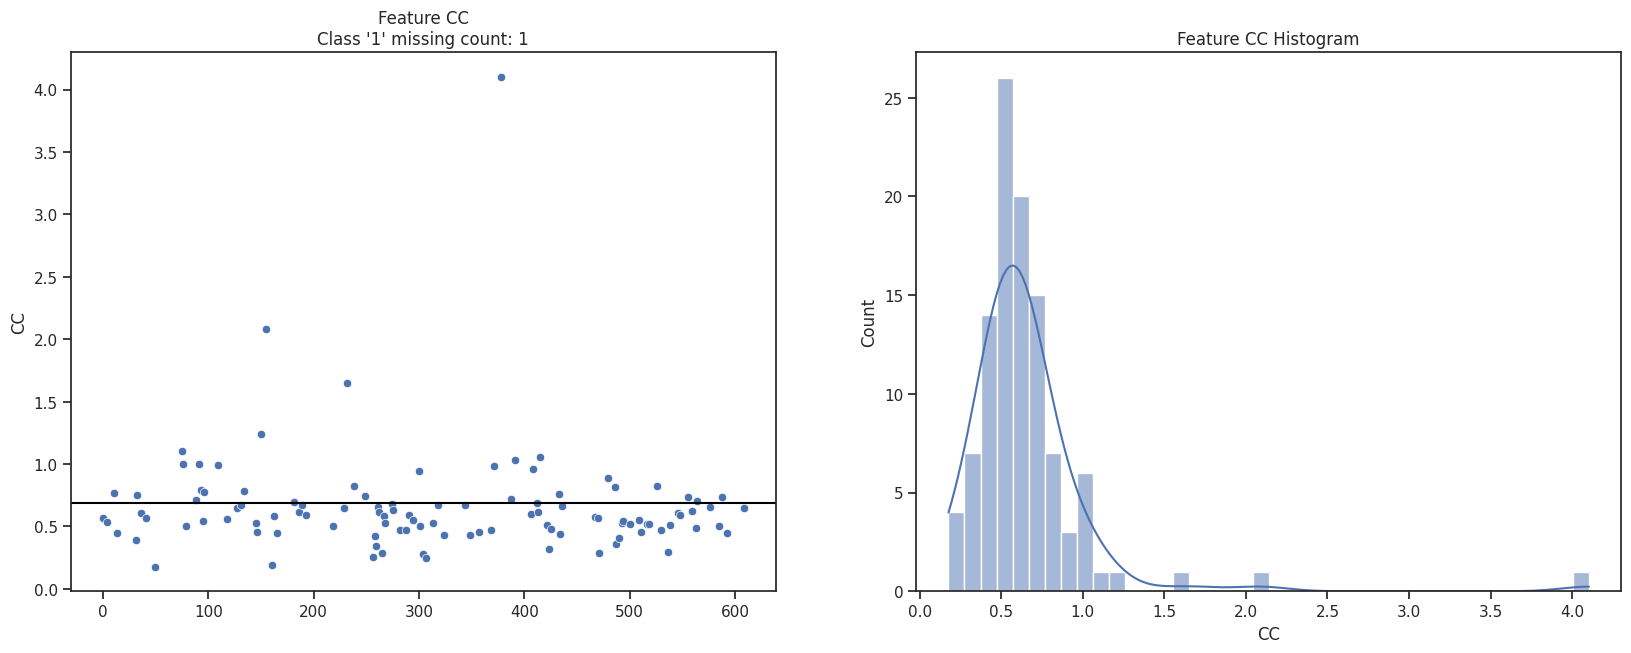

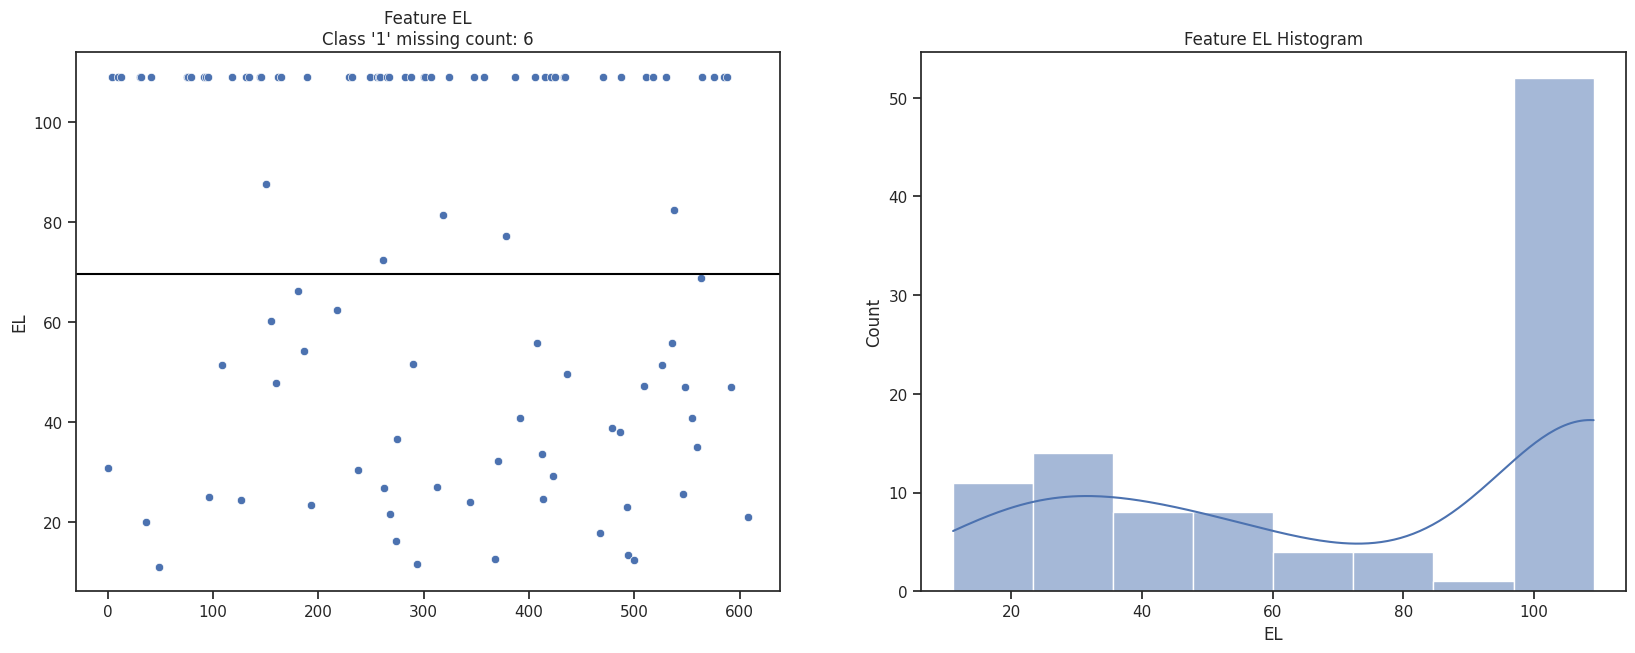

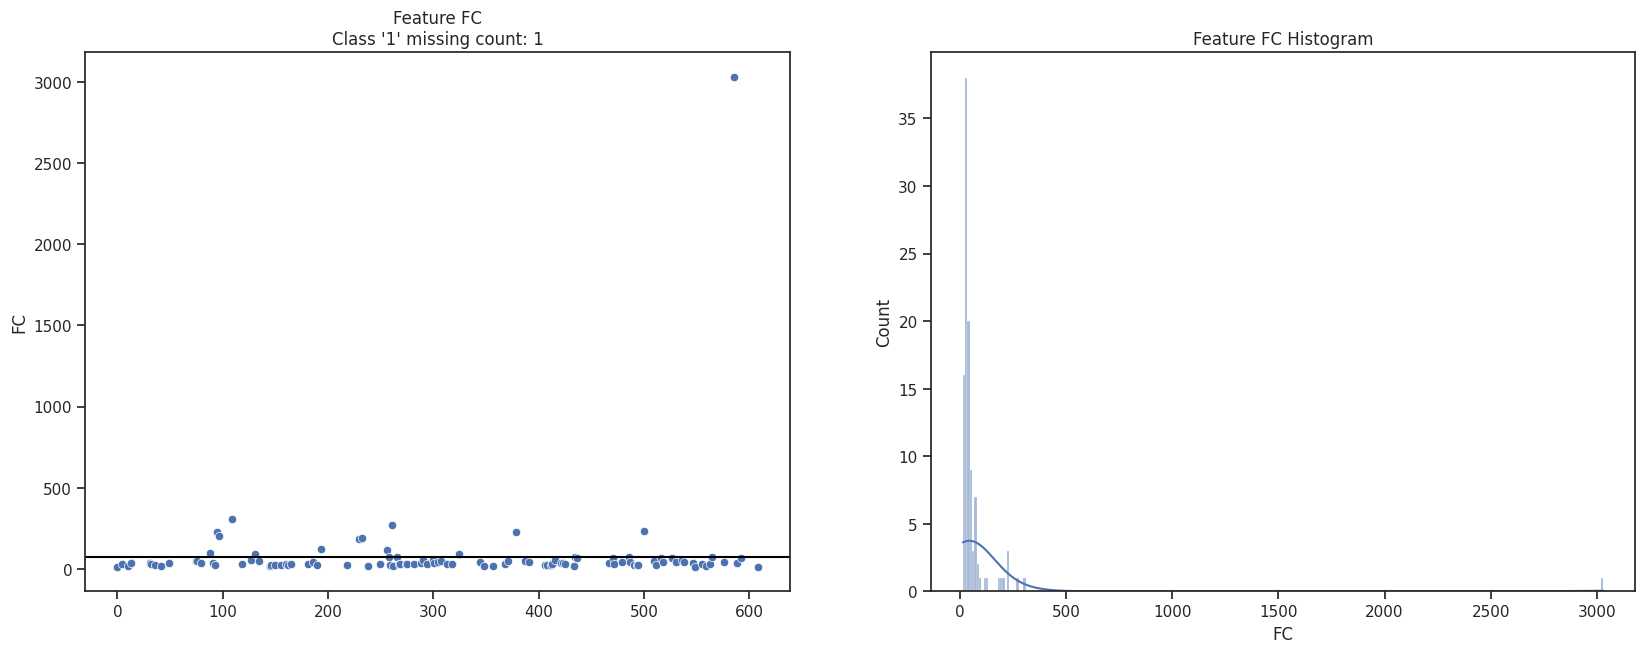

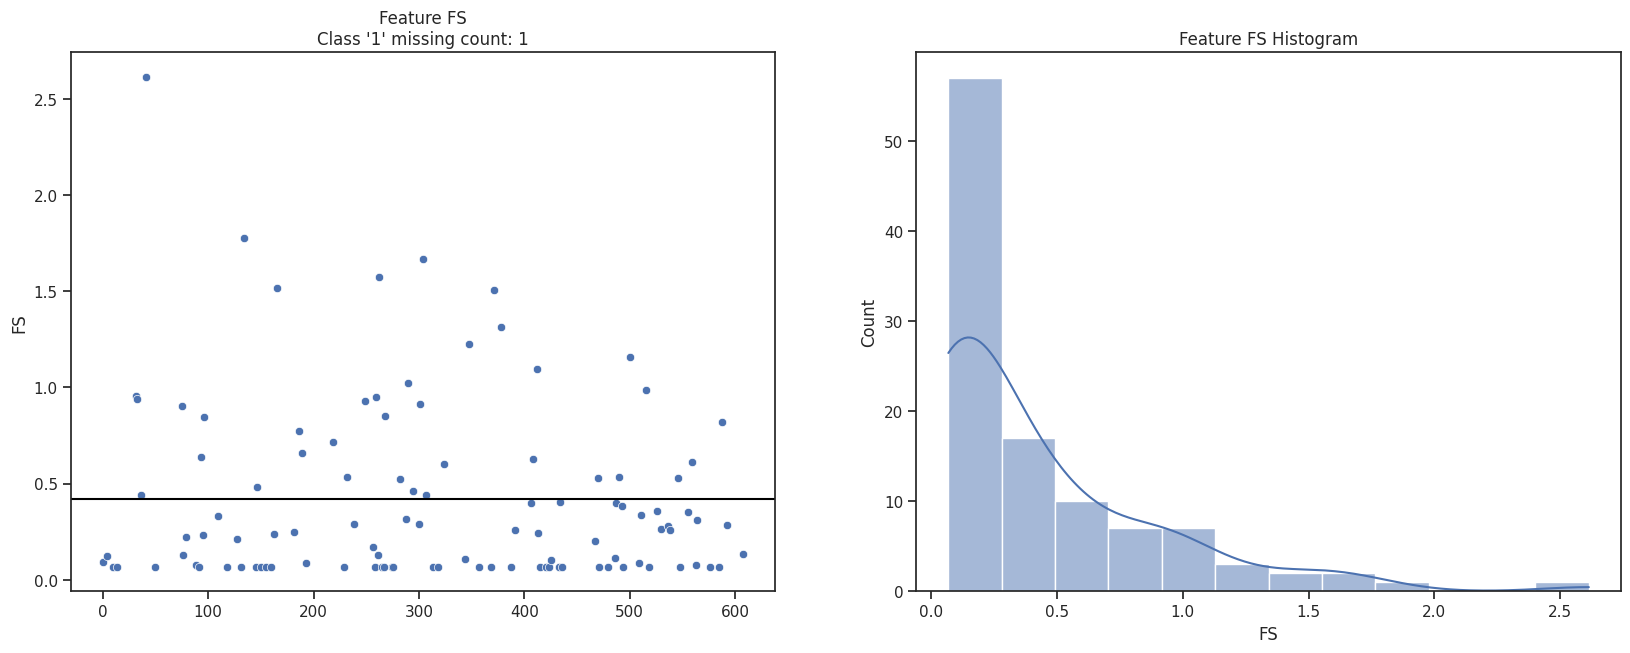

In [17]:
class_num = 1
df = train_data[train_data.Class == class_num]
for col in missing_val_cols:
    if class_num in col_class_dict[col]:
        fig, axes = plt.subplots(1, 2)
        fig.set_size_inches(20,7)
        sns.set_style("ticks")
        plot = sns.scatterplot(data=df, x=df.index, y=col, ax=axes[0])
        plot.axhline(y=np.nanmean(train_data[col]), color='black')
        plot.set_title(f"Feature {col}\nClass '{class_num}' missing count: {col_class_dict[col][class_num]}")
        hist_plot = sns.histplot(df[col], kde=True)
        hist_plot.set_title(f"Feature {col} Histogram")
        plt.show()

Resource to visualize SciPy distributions:

https://stackoverflow.com/questions/37559470/what-do-all-the-distributions-available-in-scipy-stats-look-like

The below cell imputes values by generating values from a fitted distribution on the available data.

- The available data is fitted on a distribution with the help of fitter package.
- Random variates are generated from the fitted distribution and the size parameter indicates number of values missing in that feature that need to be filled.
- Finally, the missing values are imputed by slicing rows with NaN values and setting them with the generated values.

In [18]:
## BQ, class 0

# Fitting a probability distribution on feature BQ
data = train_data[(train_data.BQ.notna())&(train_data.Class==0)]['BQ']
f = Fitter(data, distributions=['gengamma'])
f.fit()

# Generating values based on probability distribution
high = data.max()
low = data.min()
x = np.linspace(low, high, num=617)
pdf = scipy.stats.gengamma.rvs(*f.fitted_param['gengamma'], size=60)

# Imputing values in feature BQ
train_data.loc[(train_data.BQ.isna())&(train_data.Class == 0), 'BQ'] = pdf



## EL, class 0

# Fitting a probability distribution on feature BQ
data = train_data[(train_data.EL.notna())&(train_data.Class==0)]['EL']
f = Fitter(data, distributions=['dweibull'])
f.fit()

# Generating values based on probability distribution
high = data.max()
low = data.min()
x = np.linspace(low, high, num=617)
pdf = scipy.stats.dweibull.rvs(*f.fitted_param['dweibull'], size=54)

# Imputing values in feature EL
train_data.loc[(train_data.EL.isna())&(train_data.Class == 0), 'EL'] = pdf



## EL, class 1

# Fitting a probability distribution on feature BQ
data = train_data[(train_data.EL.notna())&(train_data.Class==1)]['EL']
f = Fitter(data, distributions=['dweibull'])
f.fit()

# Generating values based on probability distribution
high = data.max()
low = data.min()
x = np.linspace(low, high, num=617)
pdf = scipy.stats.dweibull.rvs(*f.fitted_param['dweibull'], size=6)

# Imputing values in feature EL
train_data.loc[(train_data.EL.isna())&(train_data.Class == 1), 'EL'] = pdf

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 18.77it/s]


In the below cell, a fixed value (value where peak of histogram occurs/mode value) is imputed since the count of missing values is less than 3 and it won't alter the distribution much.

In [19]:
## CB, class 0
hist = np.histogram(train_data[(train_data.CB.notna())&(train_data.Class==0)].CB)
train_data.loc[(train_data.CB.isna())&(train_data.Class==0), 'CB'] = hist[1][hist[0].argmax()+1]


## CC, class 0
hist = np.histogram(train_data[(train_data.CC.notna())&(train_data.Class==0)].CC)
train_data.loc[(train_data.CC.isna())&(train_data.Class==0), 'CC'] = hist[1][hist[0].argmax()+1]


## DU, class 0
hist = np.histogram(train_data[(train_data.DU.notna())&(train_data.Class==0)].DU)
train_data.loc[(train_data.DU.isna())&(train_data.Class==0), 'DU'] = hist[1][hist[0].argmax()+1]


## FL, class 0
hist = np.histogram(train_data[(train_data.FL.notna())&(train_data.Class==0)].FL)
train_data.loc[(train_data.FL.isna())&(train_data.Class==0), 'FL'] = hist[1][hist[0].argmax()+1]


## FS, class 0
hist = np.histogram(train_data[(train_data.FS.notna())&(train_data.Class==0)].FS)
train_data.loc[(train_data.FS.isna())&(train_data.Class==0), 'FS'] = hist[1][hist[0].argmax()+1]


## GL, class 0
hist = np.histogram(train_data[(train_data.GL.notna())&(train_data.Class==0)].GL)
train_data.loc[(train_data.GL.isna())&(train_data.Class==0), 'GL'] = hist[1][hist[0].argmax()+1]


## CC, class 1
hist = np.histogram(train_data[(train_data.CC.notna())&(train_data.Class==1)].CC)
train_data.loc[(train_data.CC.isna())&(train_data.Class==1), 'CC'] = hist[1][hist[0].argmax()+1]


## FS, class 1
hist = np.histogram(train_data[(train_data.FS.notna())&(train_data.Class==1)].FS)
train_data.loc[(train_data.FS.isna())&(train_data.Class==1), 'FS'] = hist[1][hist[0].argmax()+1]


## FC, class 1
hist = np.histogram(train_data[(train_data.FC.notna())&(train_data.Class==1)].FC)
train_data.loc[(train_data.FC.isna())&(train_data.Class==1), 'FC'] = hist[1][hist[0].argmax()+1]

In [20]:
## Checking if the training dataset contains any missing values

train_data.isna().sum().sum()

0

## 2. Convert EJ to one-hot encoded feature

In [21]:
EJ_class = train_data.groupby(['EJ', 'Class'])['Id'].count()
print(f"EJ_A class 0 percent = {EJ_class['A'][0]/(EJ_class['A'][0] + EJ_class['A'][1])}, \
        count = {EJ_class['A'][0]}")
print(f"EJ_A class 1 percent = {EJ_class['A'][1]/(EJ_class['A'][0] + EJ_class['A'][1])}, \
        count = {EJ_class['A'][1]}")


print(f"\nEJ_B class 0 percent = {EJ_class['B'][0]/(EJ_class['B'][0] + EJ_class['B'][1])}, \
        count = {EJ_class['B'][0]}")
print(f"EJ_B class 1 percent = {EJ_class['B'][1]/(EJ_class['B'][0] + EJ_class['B'][1])}, \
        count = {EJ_class['B'][1]}")

EJ_A class 0 percent = 0.8738738738738738,         count = 194
EJ_A class 1 percent = 0.12612612612612611,         count = 28

EJ_B class 0 percent = 0.7974683544303798,         count = 315
EJ_B class 1 percent = 0.20253164556962025,         count = 80


In [22]:
EJ_encoded = pd.get_dummies(train_data['EJ'], prefix='EJ')
train_data.drop(['EJ'], axis=1, inplace=True)
train_data = train_data.join(EJ_encoded)

EJ_encoded = pd.get_dummies(test_data['EJ'], prefix='EJ')
test_data.drop(['EJ'], axis=1, inplace=True)
test_data = test_data.join(EJ_encoded)
if 'EJ_A' not in test_data.columns:
    test_data['EJ_A'] = 0
if 'EJ_B' not in test_data.columns:
    test_data['EJ_B'] = 0

Note: The percent values denote percentages within EJ = some_x_value and not in the dataset as a whole.

In [23]:
print(f"EJ_A class 0 percent = {EJ_class['A'][0]/617}")
print(f"EJ_A class 1 percent = {EJ_class['A'][1]/617}")


print(f"\nEJ_B class 0 percent = {EJ_class['B'][0]/617}")
print(f"EJ_B class 1 percent = {EJ_class['B'][1]/617}")

EJ_A class 0 percent = 0.31442463533225284
EJ_A class 1 percent = 0.04538087520259319

EJ_B class 0 percent = 0.5105348460291734
EJ_B class 1 percent = 0.12965964343598055


## Looking to see the distributions of each dimension

In [28]:
## Dropping BQ and EL since they have 60 rows missing
## Dropped EJ since it is categorical data
## Then dropping the NAs since only a few rows are missing from
## [, 'CB', 'CC', 'DU', 'FC', 'FL', 'FS', 'GL']

# df_values = train_data.drop(columns = ['BQ', 'EL'])
# df_values_no_BQ_EL_na = df_values.dropna()

import pdb
df_dist = []
fields_not_analyzed = []
for field in train_data:
  try:

    # f = Fitter(df_class[field],
    #           distributions=['gamma',
    #                           'lognorm',
    #                           "beta",}
    #                           "burr",
    #                           "norm"])
    f = Fitter(train_data[field],
              distributions=get_common_distributions())

    f.fit()
    # df.rename_axis('bar').reset_index()
    df_temp = f.get_best(method = 'sumsquare_error')
    # df_temp = f.summary().rename_axis('distribution').reset_index()
    df_temp['field'] = field
    df_dist.append(df_temp)
  except:
    fields_not_analyzed.append(field)
    #pdb.set_trace()

  #f.summary()
# f.get_best(method = 'sumsquare_error')

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.49it/s]


In [29]:
fields_not_analyzed

['Id']

In [30]:
df_dist[0]

{'lognorm': {'s': 0.7519879019793337,
  'loc': 0.06001040719003706,
  'scale': 0.3062455824451926},
 'field': 'AB'}

In [31]:
test_df = pd.DataFrame.from_dict(df_dist)

In [32]:
test_df

,lognorm,field,gamma,expon,norm,cauchy,powerlaw,exponpow,chi2
0,"{'s': 0.7519879019793337, 'loc': 0.06001040719...",AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AF,"{'a': 3.8805661086592167, 'loc': -466.69730926...",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,AH,NaN,"{'loc': 85.200147, 'scale': 33.42436567179904}",NaN,NaN,NaN,NaN,NaN
3,"{'s': 1.030417267781341, 'loc': 2.898312550134...",AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,AR,NaN,"{'loc': 8.138688, 'scale': 1.989554051863859}",NaN,NaN,NaN,NaN,NaN
5,"{'s': 0.2913807235474778, 'loc': -1.7802205878...",AX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,AY,NaN,"{'loc': 0.025578, 'scale': 0.03474162398703402}",NaN,NaN,NaN,NaN,NaN
7,NaN,AZ,NaN,NaN,"{'loc': 10.566446961102107, 'scale': 4.3471183...",NaN,NaN,NaN,NaN
8,NaN,BC,NaN,"{'loc': 1.2299, 'scale': 6.823111588330632}",NaN,NaN,NaN,NaN,NaN
9,NaN,BD,NaN,NaN,NaN,"{'loc': 4951.688992907246, 'scale': 846.301504...",NaN,NaN,NaN


In [33]:
df_dist

[{'lognorm': {'s': 0.7519879019793337,
   'loc': 0.06001040719003706,
   'scale': 0.3062455824451926},
  'field': 'AB'},
 {'gamma': {'a': 3.8805661086592167,
   'loc': -466.69730926886547,
   'scale': 1022.7143125999565},
  'field': 'AF'},
 {'expon': {'loc': 85.200147, 'scale': 33.42436567179904}, 'field': 'AH'},
 {'lognorm': {'s': 1.030417267781341,
   'loc': 2.8983125501348663,
   'scale': 19.172910572927144},
  'field': 'AM'},
 {'expon': {'loc': 8.138688, 'scale': 1.989554051863859}, 'field': 'AR'},
 {'lognorm': {'s': 0.2913807235474778,
   'loc': -1.7802205878327384,
   'scale': 7.003810814177758},
  'field': 'AX'},
 {'expon': {'loc': 0.025578, 'scale': 0.03474162398703402}, 'field': 'AY'},
 {'norm': {'loc': 10.566446961102107, 'scale': 4.347118348721053},
  'field': 'AZ'},
 {'expon': {'loc': 1.2299, 'scale': 6.823111588330632}, 'field': 'BC'},
 {'cauchy': {'loc': 4951.688992907246, 'scale': 846.3015046597625},
  'field': 'BD '},
 {'norm': {'loc': 21.419492382495946, 'scale': 3.475

## Finding Multi-Collinearity

https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b

In [34]:
#Interactive template to choose a color palette
# https://seaborn.pydata.org/generated/seaborn.choose_diverging_palette.html#seaborn.choose_diverging_palette

#sns.choose_diverging_palette(as_cmap=False)


<ipython-input-35-42b1993be5ad>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train_data.corr(), dtype=bool))
<ipython-input-35-42b1993be5ad>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), cmap=rdbl, annot=True, mask=mask, vmin=-1, vmax=1)


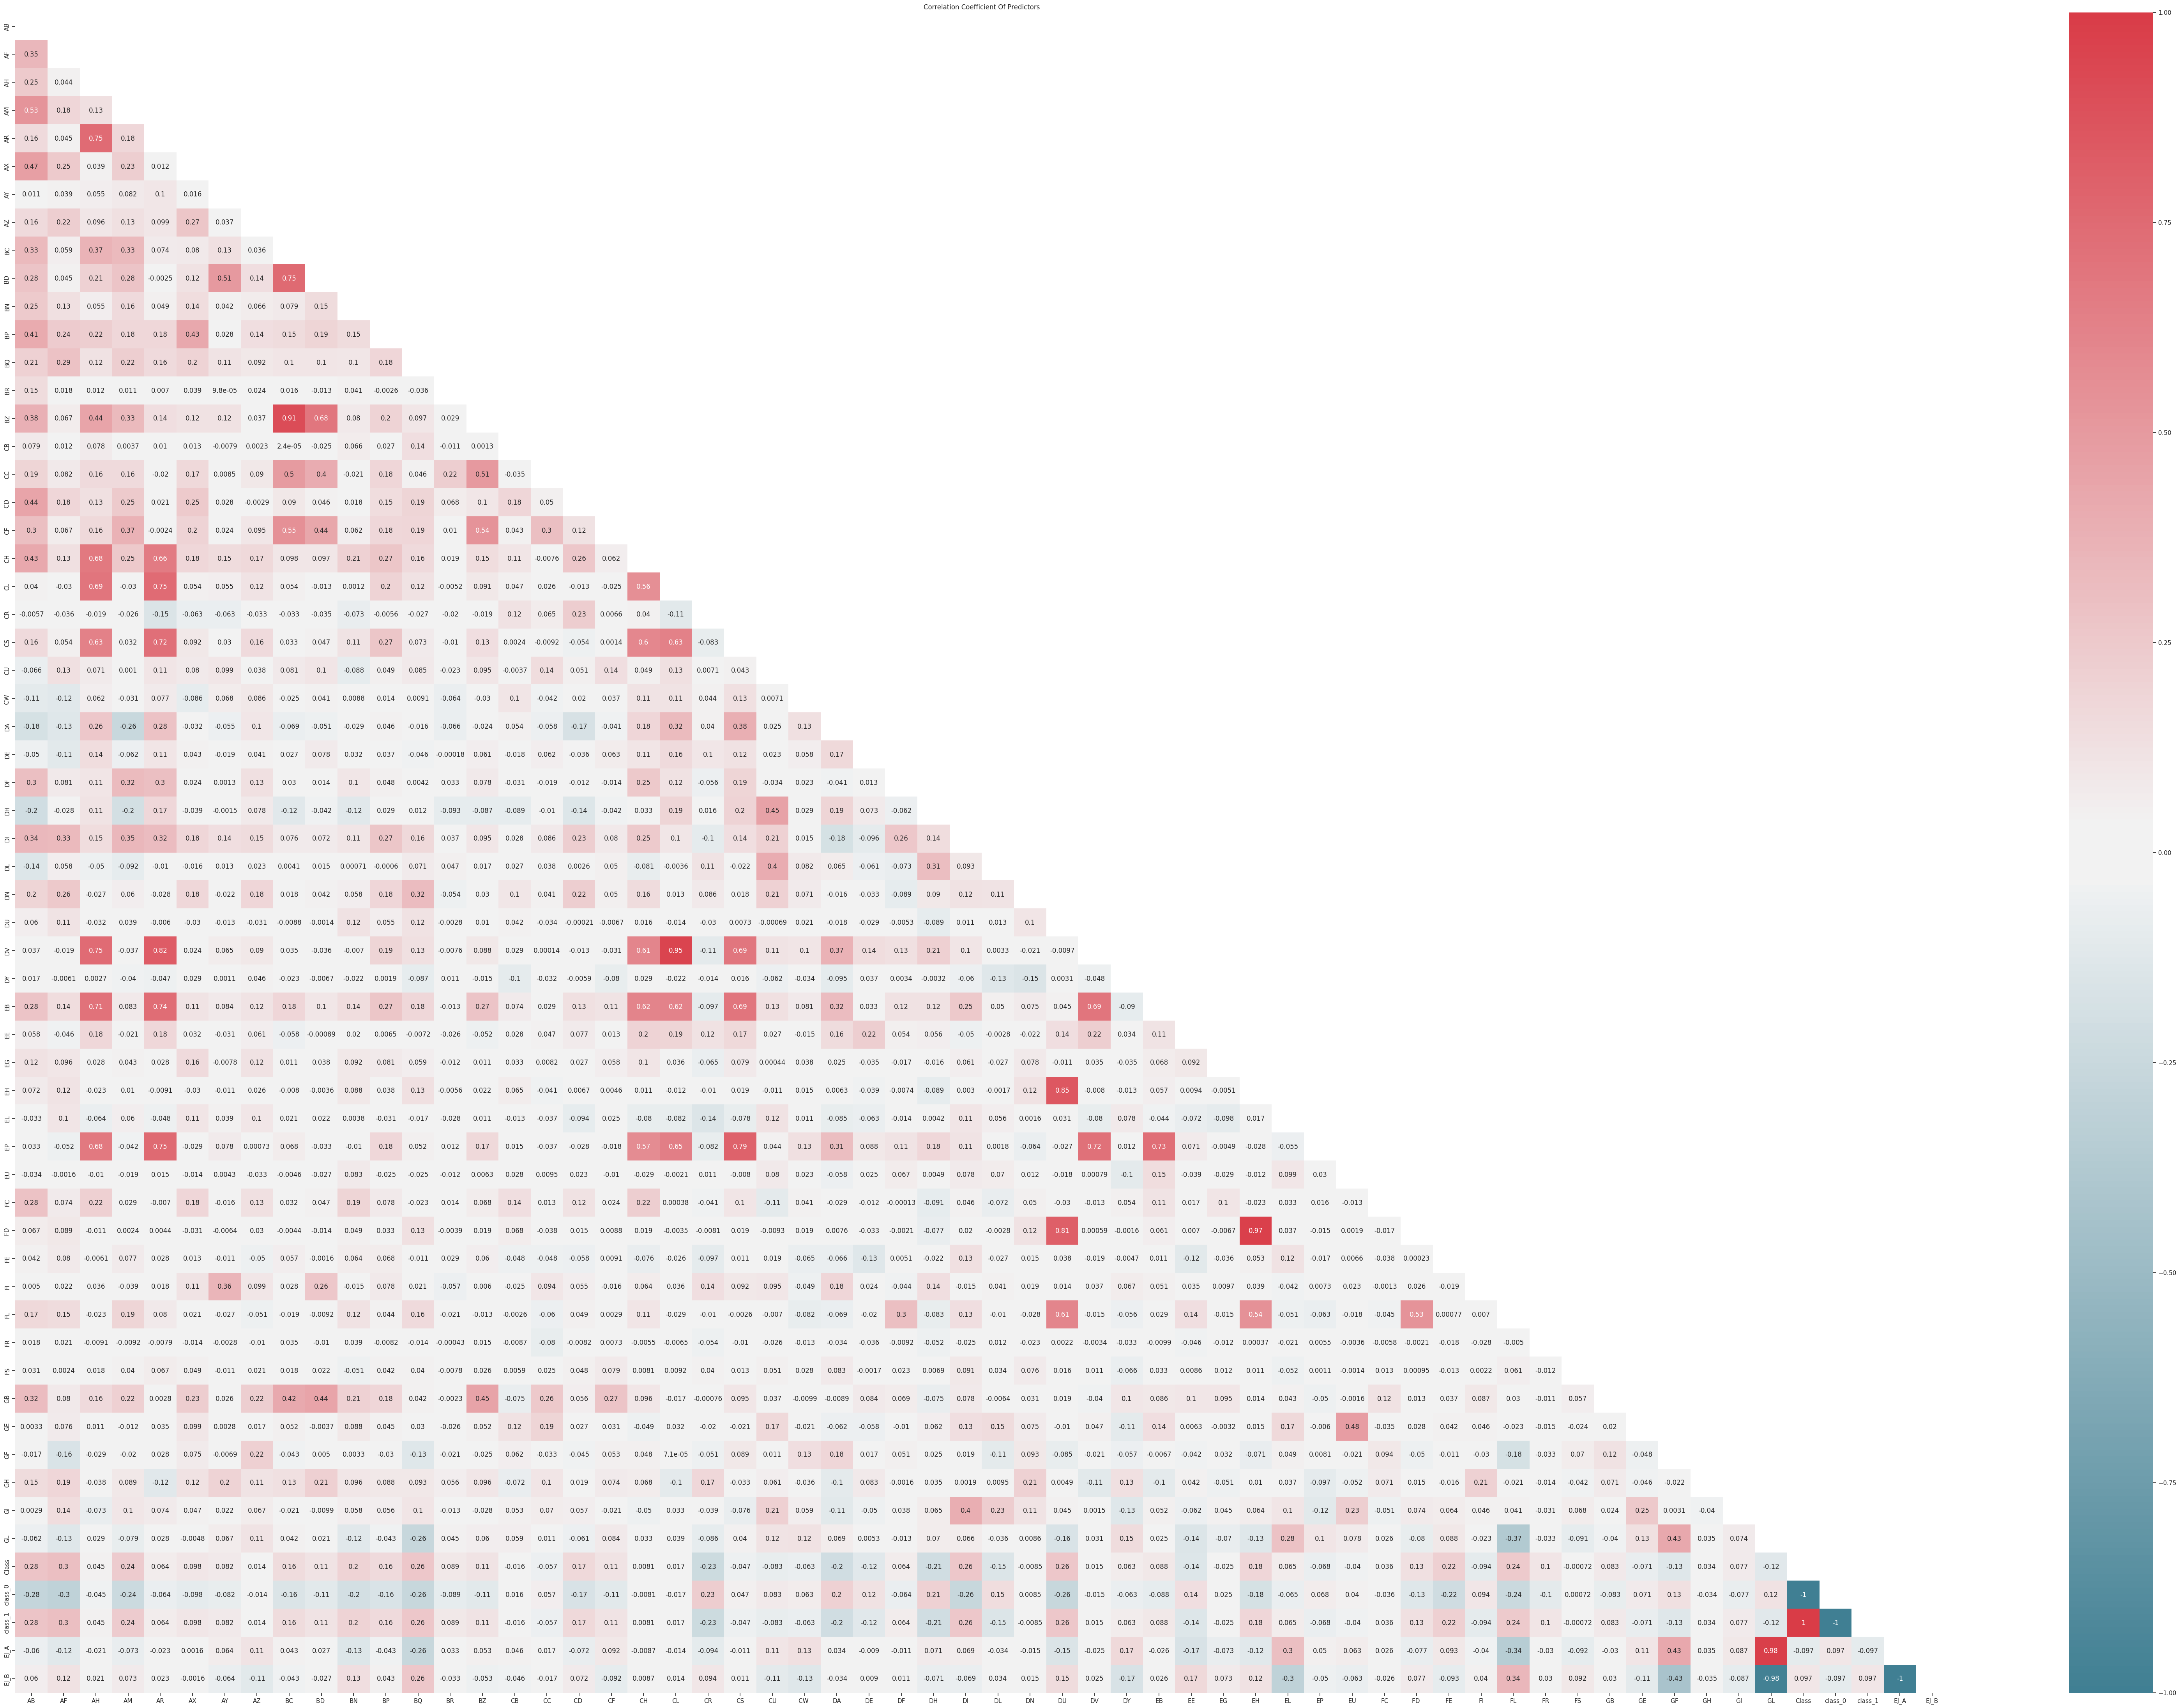

In [35]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size
plt.figure(figsize=(80,56))

#fig, ax = plt.subplots()
#Choosing a diverging color template:
#https://stackoverflow.com/questions/56536419/how-to-set-center-color-in-heatmap
rdbl = sns.diverging_palette(h_neg=220, h_pos=10, s=74, l=50, sep=10, as_cmap=True)

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(train_data.corr(), dtype=bool))

# df_values_no_BQ_EL_na

# generate heatmap
sns.heatmap(train_data.corr(), cmap=rdbl, annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

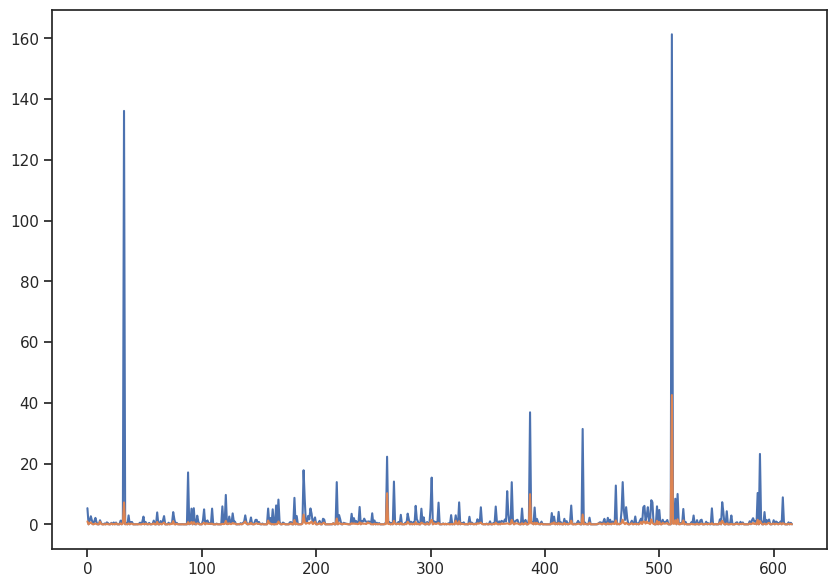

In [36]:
## Looking directly at a correlated variable
plt.figure(figsize=(10,7))

plt.plot(train_data.index, train_data['DU'])
plt.plot(train_data.index, train_data['EH'])

plt.show()

## Using Variance Inflation Factor to determine which variables to potentially remove

In [37]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features


def compute_vif(df, features):

    X = df[features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [38]:
#na check
train_data.isna().sum()

Id         0
AB         0
AF         0
AH         0
AM         0
          ..
Class      0
class_0    0
class_1    0
EJ_A       0
EJ_B       0
Length: 61, dtype: int64

In [39]:

df_values = train_data.drop(columns = ['Id'])


compute_vif(df_values, df_values.columns).sort_values('VIF', ascending=False)

,Variable,VIF
59,EJ_B,inf
57,class_1,inf
55,Class,inf
58,EJ_A,inf
56,class_0,inf
54,GL,29.649157
38,EH,28.865676
43,FD,23.479449
33,DV,19.403625
20,CL,12.129359


### Candidate columns to drop which are above 5 VIF per wiki:
https://en.wikipedia.org/wiki/Variance_inflation_factor#cite_note-Sheather_2009_p.-6

GL, EH, FD, DV, CL, BC, BZ, AR, AH, BD, EP, DU

## To Do Items

For which class values is the mean value reasonable
Impute base on class value -- so like class 0, is mean in that?
* Need to check best techniques for imputing missing values based on the distribution of the column and possibly the class
* PCA - Need to merge columns which have high multi-collinearity
* Actually removing dimensions and that process
* One hot encoding
* Outlier detection / removal for specific dimensions?
  * What class do the outliers belong to? If only one class, then 'spikes' are helpful!

Model Building
* Clustering -- try k-means for instance
* See what output is for random forest, SVC


Understand what we have to submit in kaggle competition
* Need to use random forest regressive to output probability values rather than classifiers ( see SKLearn package)

Algos:
* Ryan - Try Random Forest Regressive
* Rohit - Unsupervised Model

# 3. Make ML model

In [40]:
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


## Log Loss Evaluation Function

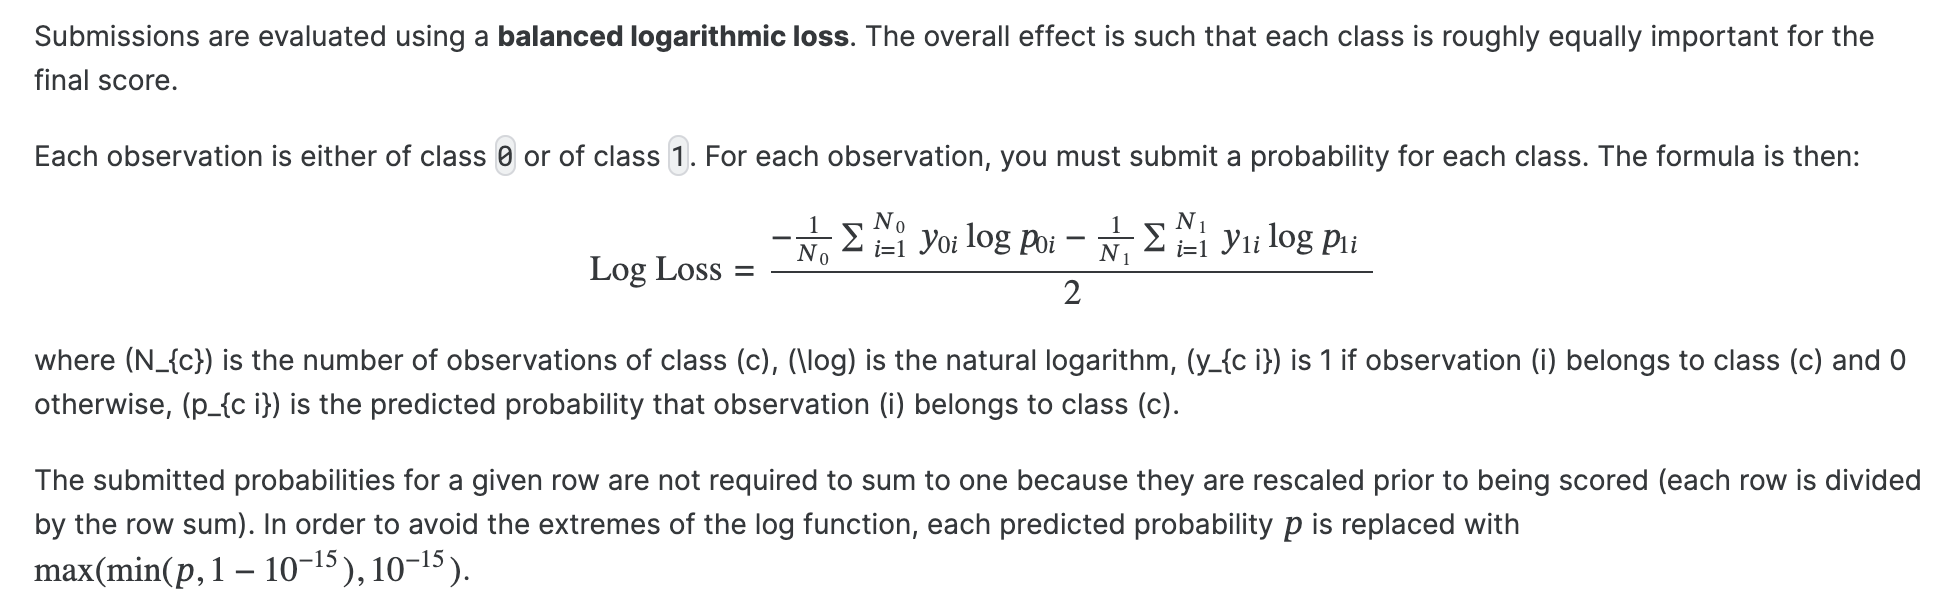

In [41]:
def get_log_loss(df, y_0, y_1):
    """
    Calculates log loss for two classes (0 & 1).
    Parameters:
        df: Dataframe with columns 'class_0' and 'class_1' denoting classes probabilities.
        y_0: array with class 0 samples labeled as 1, otherwise 0.
        y_1: array with class 1 samples labeled as 1, otherwise 0.
    Returns:
        Log loss for the input.
    """

    N_0 = (y_0 == 1).sum()
    N_1 = (y_1 == 1).sum()

    p_0 = np.log(df['class_0']+0.000001)
    p_1 = np.log(df['class_1']+0.000001)

    log_loss = ((-1/N_0)*(np.sum(y_0*p_0)) + (-1/N_1)*(np.sum(y_1*p_1)))/2

    return log_loss

##Get Log Loss function for random forest

In [42]:
#CORRECT LOG LOSS TO USE
def log_loss(y_true, prob_pred):
    """
    Calculates log loss for two classes (0 & 1).
    Parameters:
        y_true: True labels array for the classes.
        prob_pred: Predicted probability values for the class.
    Returns:
        Log loss for the input.
    """

    N_0 = (y_true == 0).sum()
    N_1 = (y_true == 1).sum()

    y_0 = y_true
    y_1 = -1 * (y_true - 1)

    p_0 = np.log(prob_pred + 1)
    p_1 = np.log(1 - prob_pred + 1)

    log_loss = ((-1/N_0)*(np.sum(y_0*p_0)) + (-1/N_1)*(np.sum(y_1*p_1)))/2

    return log_loss

### Making the custom scorer

In [43]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#SVC, SVR scorer
log_loss_score = make_scorer(score_func=get_log_loss, greater_is_better=False, needs_proba=True)

#RF Scorer
rf_log_loss_score = make_scorer(score_func=log_loss, greater_is_better=False)
# rf_log_loss_score = make_scorer(score_func=get_log_loss)

### Splitting the Data

In [44]:
X = train_data.drop(['Id', 'Class', 'class_0', 'class_1'], axis=1)
y = train_data['class_0']

### Handling Imbalanced Classes

In [45]:
#SMOTE creates synthetic data in the minority class to over represent it. This helps the model learn better on the minority class.
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_imb, y_imb = oversample.fit_resample(X, y)

### Scaling the Data

In [46]:
## Scaling the features for better optimization process

scalar = StandardScaler()
X = scalar.fit_transform(X_imb)

### Using VIF to remove dimensions

In [47]:
features = ['CS', 'EB', 'CH', 'AB', 'FL', 'AY', 'AM', 'DI', 'CC', 'CF', 'AX', 'CD ', 'DH', 'CU', 'DF', 'DA', 'GB', 'DN', 'GE', 'AF'
            ,'BP', 'GF', 'GI', 'BQ', 'FI', 'EE', 'DL', 'FC', 'EU', 'AZ', 'CR', 'GH', 'BN', 'EL', 'DY', 'FE', 'BR', 'DE', 'CW ', 'CB', 'EG', 'FS', 'FR']

X_vif = train_data.loc[:,features]

oversample = SMOTE()
X_imb, y_imb = oversample.fit_resample(X_vif, y)

scalar = StandardScaler()
X_vif = scalar.fit_transform(X_imb)

### Looking at Variables to Remove via PCA

In [48]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [49]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_imb,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Cumulative Variances (Percentage):
[12.70010847 21.09721238 28.56358029 34.22726502 39.25913803 43.94807052
 48.24692953 51.46193004 54.19602825 56.82068764 59.23786222 61.52640879
 63.67966981 65.60539574 67.49353156 69.24068401 70.96714707 72.6442105
 74.23583015 75.77500603 77.2766004  78.67627093 80.02227804 81.30568704
 82.53168762 83.75080352 84.9068981  86.03130867 87.04340407 88.02981049
 88.95645263 89.83433435 90.6698994 ]
Number of components: 33


Text(0, 0.5, 'Explained variance (%)')

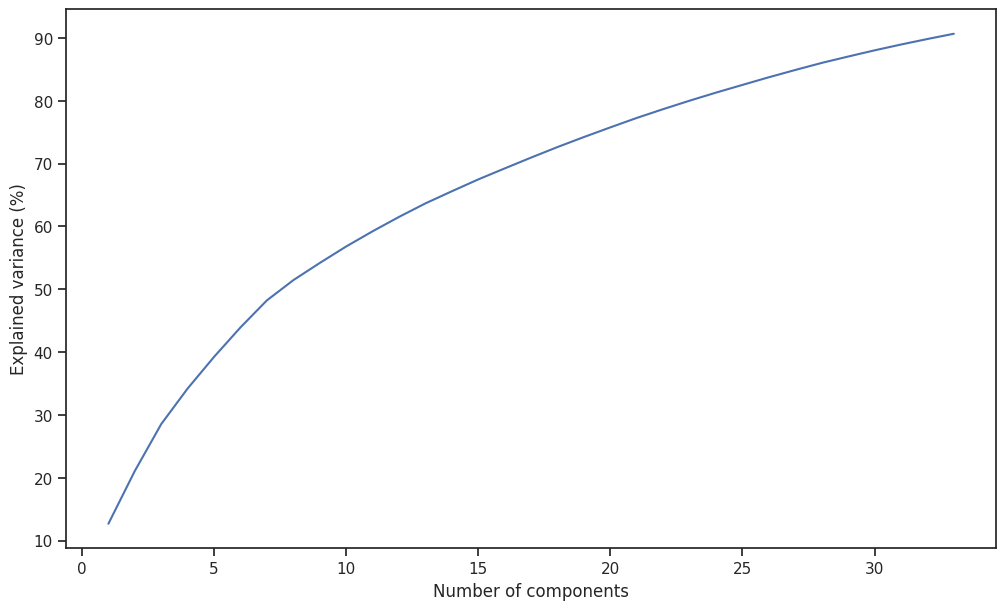

In [50]:
pca = PCA(n_components = 0.9)
pca.fit(X)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [52]:
pca_components = abs(pca.components_)

print('Top most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top values in each row
    temp = np.argpartition(-(pca_components[row]), 10)

    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:10]

    # print the top 10 feature names

    print(f'Component {row}: {train_data.drop(columns = ["Id", "Class", "class_0", "class_1"]).columns[indices].to_list()}')

Top most important features in each component
Component 0: ['AH', 'BZ', 'AB', 'BC', 'CH', 'BD ', 'EB', 'CF', 'CC', 'AR']
Component 1: ['DV', 'CL', 'EP', 'CS', 'AR', 'DA', 'EB', 'AH', 'BD ', 'BC']
Component 2: ['FL', 'DU', 'EH', 'FD ', 'GL', 'EJ_A', 'EJ_B', 'GF', 'BQ', 'AF']
Component 3: ['EJ_B', 'GL', 'BD ', 'DI', 'BC', 'EL', 'BZ', 'CC', 'DE', 'AF']
Component 4: ['FD ', 'EH', 'EJ_A', 'DU', 'GL', 'EJ_B', 'CU', 'FI', 'DL', 'GF']
Component 5: ['CU', 'DH', 'DL', 'AF', 'DN', 'FI', 'GH', 'FD ', 'BZ', 'CR']
Component 6: ['FC', 'CR', 'CB', 'AY', 'EE', 'CD ', 'DE', 'GF', 'AX', 'AZ']
Component 7: ['AY', 'FI', 'GE', 'GH', 'EU', 'CC', 'GI', 'DY', 'CH', 'DL']
Component 8: ['GI', 'DF', 'DY', 'BP', 'FE', 'EU', 'DN', 'CB', 'CW ', 'GF']
Component 9: ['CB', 'EU', 'GE', 'GF', 'CD ', 'FC', 'DF', 'AZ', 'AM', 'BR']
Component 10: ['GE', 'EU', 'BN', 'CD ', 'CW ', 'AX', 'FI', 'BP', 'EL', 'DL']
Component 11: ['DF', 'EE', 'BR', 'DY', 'FR', 'EG', 'CR', 'DA', 'CW ', 'DN']
Component 12: ['BR', 'DL', 'FR', 'FC', 'BN

In [53]:
X_pca = pca.transform(X)

In [54]:
#cross_val_score(classifier, X, y, cv=3, scoring=log_loss_score)

## Random Forest Model

In [151]:
import numpy as np
import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel



X_train, X_test, y_train, y_test = train_test_split(X, y_imb, test_size=0.2, random_state=0, stratify=y_imb)
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 0).fit(X_train, y_train)

## Reduced features via VIF
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, y_imb, test_size=0.2, random_state=0, stratify=y_imb)
rf_vif = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 0).fit(X_train_vif, y_train_vif)



### Random Forest -- PCA Pipeline

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 0)
rf_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y_imb,
                     test_size=0.2,
                     random_state=0,
                     stratify = y_imb)
# train the model using the PCA components
rf_regress_model.fit(X_train,y_train)



Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=33)),
                ('regressor',
                 RandomForestRegressor(max_depth=5, max_features='sqrt',
                                       n_estimators=300, random_state=0))])

### Before SMOTE

In [57]:
# #
# prediction = rf.predict(X_test)
# # accuracy_score(y_test, prediction)
# mse = mean_squared_error(y_test, prediction)
# rmse = mse**.5
# print(mse)
# print(rmse)

### After SMOTE

In [58]:
prediction = rf.predict(X_test)
# accuracy_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.060362577006170266
0.2456879667508571


After SMOTE - reduced features with VIF

In [59]:
prediction = rf_vif.predict(X_test_vif)
# accuracy_score(y_test, prediction)
mse = mean_squared_error(y_test_vif, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.08902009663290714
0.2983623579356269


After SMOTE - reduced features with PCA

In [60]:
prediction = rf_regress_model.predict(X_test)
# accuracy_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.1114720415207329
0.33387428999659874


In [61]:
fi = rf_vif.feature_importances_

np.sort(fi)
# importances = forest.feature_importances_
# save the column titles first
# then sort on feature importance
# create df then see which features have the highest impact

array([0.00515054, 0.00536076, 0.00593162, 0.00605848, 0.00633488,
       0.00646412, 0.00668691, 0.00767541, 0.00777613, 0.00818322,
       0.00873009, 0.00906633, 0.00919648, 0.00952161, 0.00962238,
       0.00989061, 0.01002639, 0.0116936 , 0.0134928 , 0.01393565,
       0.01467139, 0.01655484, 0.01702427, 0.01716943, 0.01774274,
       0.01831851, 0.0193935 , 0.01940027, 0.0194911 , 0.02206425,
       0.02284796, 0.02395539, 0.0246012 , 0.02513498, 0.02662693,
       0.03128157, 0.03160787, 0.04980276, 0.05180126, 0.05980011,
       0.06344197, 0.1010675 , 0.13540219])

## Trying to get the rf_log_loss_score to work 'Stuck HERE'

In [148]:
# # X_imb['class_0'] = train_data['class_0']
# # X_imb['class_1'] = train_data['class_1']
# cross_val_score(rf, X, y_imb, cv=5, scoring=rf_log_loss_score, error_score = 'raise')

> <ipython-input-134-b638778298f2>(28)log_loss()
     24 
     25     if np.isinf(log_loss) == True:
     26       import pdb
     27       pdb.set_trace()
---> 28     return log_loss

ipdb> exit


In [153]:
#CORRECT LOG LOSS TO USE
def log_loss(y_true, prob_pred):
    """
    Calculates log loss for two classes (0 & 1).
    Parameters:
        y_true: True labels array for the classes.
        prob_pred: Predicted probability values for the class.
    Returns:
        Log loss for the input.
    """

    N_0 = (y_true == 0).sum()
    N_1 = (y_true == 1).sum()

    y_0 = y_true
    y_1 = -1 * (y_true - 1)

    p_0 = np.log(prob_pred + 1)
    p_1 = np.log(1 - prob_pred + 1)

    #import pdb
    #pdb.set_trace()
    log_loss = ((-1/N_0)*(np.sum(y_0*p_0)) + (-1/N_1)*(np.sum(y_1*p_1)))/2

    if np.isinf(log_loss) == True:
      import pdb
      pdb.set_trace()
    return log_loss

In [154]:
rf_log_loss_score = make_scorer(score_func=log_loss, greater_is_better=False)

In [162]:
#cross_val_score(classifier, X, y, cv=3, scoring=log_loss_score)

grid1 = {
    'n_estimators': [200,300,400,500,600,700,800],
    # 'n_estimators': [500],
    'max_features': ['sqrt'],
    'max_depth' : [5,6,7, 8,9,10],
    # 'max_depth' : [6],
    'random_state' : [0]
}
## show start time
print(datetime.datetime.now())
## Grid Search function
skf = StratifiedKFold(n_splits=5)
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv= skf, scoring = rf_log_loss_score, error_score = 'raise')
# CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv= 5, error_score = 'raise')
CV_rfr.fit(X, y_imb)
## show end time
print(datetime.datetime.now())

2023-06-16 19:35:09.672718
2023-06-16 19:41:37.457561


In [161]:
data_columns = train_data.drop(['Id', 'Class', 'class_0', 'class_1'], axis=1)
data_columns = data_columns.columns
selected_features = data_columns[CV_rfr.best_estimator_.named_steps['feature_selection'].get_support()]

AttributeError: ignored

In [160]:
#finding best features of model:
X_columns = train_data.drop(['Id', 'Class', 'class_0', 'class_1'], axis=1)

CV_rfr.fit(X, y_imb)
CV_rfr.get_support()

selected_feat= X_columns.columns[(CV_rfr.get_support())]

len(selected_feat)
print(selected_feat)

KeyboardInterrupt: ignored

In [ ]:
pd.Series(CV_rfr.estimator_,feature_importances_,.ravel()).hist()

In [139]:
print(CV_rfr.best_params_)
print(CV_rfr.scorer_)
print(CV_rfr.cv_results_)

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 0}
make_scorer(log_loss, greater_is_better=False)
{'mean_fit_time': array([2.08507667]), 'std_fit_time': array([0.71570053]), 'mean_score_time': array([0.06811671]), 'std_score_time': array([0.04434095]), 'param_max_depth': masked_array(data=[6],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['sqrt'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[500],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_random_state': masked_array(data=[0],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 0}], 'split0_test_score': array([0.5720925]), 'split1_test_score': array([0.58730603]), 'split2_test_score': array([0.5943546]), 'split3

In [144]:
# X_test_fs = CV_rfr.best_estimator_.named_steps['fs'].transform(X_test)
# pred = CV_rfr.best_estimator_.named_steps['clf'].predict(X_test_fs)

pred = CV_rfr.best_estimator_.predict(X)

In [145]:
N_0 = (y_imb == 0).sum()
N_1 = (y_imb == 1).sum()

y_0 = y_imb
y_1 = -1 * (y_imb - 1)

p_0 = np.log(pred + 1)
p_1 = np.log(1 - pred + 1)

log_loss = ((-1/N_0)*(np.sum(y_0*p_0)) + (-1/N_1)*(np.sum(y_1*p_1)))/2

In [146]:
log_loss

-0.6622584446198454

In [107]:
# np.isinf(y_imb).sum()
print(np.isnan(y_imb).any(), np.isnan(pred).any())

False False


In [147]:
CV_rfr.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': 'raise',
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1.0,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(),
 'n_jobs': None,
 'param_grid': {'n_estimators': [200, 300, 400, 500, 600, 700, 800],
  'max_features': ['sqrt'],
  'max_depth': [5, 6, 7, 8, 9, 10],
  'random_state': [0]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': make_scorer(log_loss, gre

### Evaluating Random Forest Model

In [ ]:
prediction_CV = CV_rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction_CV)
rmse = mse**.5
print(mse)
print(rmse)

0.0687674134481027
0.26223541608276846


In [ ]:
prediction_CV

array([0.73506305, 0.98857538, 0.91993378, 0.96859513, 0.33781443,
       0.8522142 , 0.21785938, 0.40392146, 0.95859106, 0.9857672 ,
       0.42100821, 0.88217393, 0.38518031, 0.92376061, 0.96817275,
       0.97740961, 0.26403347, 0.88106842, 0.8617012 , 0.88218325,
       0.9740932 , 0.9706126 , 0.94780862, 0.94262107, 0.9854194 ,
       0.69276658, 0.97849394, 0.52868804, 0.92809631, 0.95811934,
       0.95709823, 0.55730842, 0.80096322, 0.98588637, 0.95453473,
       0.84474425, 0.94964496, 0.33592533, 0.94985424, 0.41506144,
       0.34732051, 0.96785404, 0.31122938, 0.66703511, 0.8260636 ,
       0.45111129, 0.53251018, 0.75198138, 0.86530319, 0.86967483,
       0.65205101, 0.3558795 , 0.86509474, 0.63755865, 0.96144576,
       0.78797598, 0.93116935, 0.99557039, 0.81107623, 0.95587427,
       0.85207827, 0.92601835, 0.97727377, 0.87967284, 0.91907737,
       0.9965779 , 0.78889646, 0.99360787, 0.94648527, 0.30554452,
       0.96956006, 0.91603337, 0.96269548, 0.51847818, 0.79518

## Support Vector Regression model

Performs a regression calculation with class_0 as prediction variable and directly outputs a probability as output.

In [53]:
classifier = SVR()
classifier.fit(X, y)

SVR()

In [54]:
X_test = scalar.transform(test_data.drop(['Id'], axis=1))

test_data['class_0'] = classifier.predict(X_test)
test_data['class_1'] = 1 - test_data['class_0']

NameError: ignored

In [55]:
test_data[['Id', 'class_0', 'class_1']].to_csv('submission.csv')
test_data[['Id', 'class_0', 'class_1']]

KeyError: ignored

## Support Vector Classification

Performs a binary classification and produces a probability matrix indicating the probability the sample belongs to a class.

In [51]:
classifier = SVC(probability=True)
classifier.fit(X, y)

SVC(probability=True)

In [52]:
classifier.predict_proba(X_test)

NameError: ignored

In [ ]:
test_data

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GB,GE,GF,GH,GI,GL,EJ_A,EJ_B,class_0,class_1
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.654894,0.345106
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.654894,0.345106
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.654894,0.345106
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.654894,0.345106
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.654894,0.345106


In [ ]:
pd.read_csv('submission.csv')

,Unnamed: 0,Id,class_0,class_1
0,0,00eed32682bb,0.654894,0.345106
1,1,010ebe33f668,0.654894,0.345106
2,2,02fa521e1838,0.654894,0.345106
3,3,040e15f562a2,0.654894,0.345106
4,4,046e85c7cc7f,0.654894,0.345106


## Data Integration

In [ ]:
df_greeks = pd.read_csv('/content/drive/MyDrive/Capstone/ICR - Identifying Age-Related Conditions/data/greeks.csv')

In [ ]:
df_all = pd.merge(train_data, df_greeks, on="Id")

In [ ]:
df_all.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,Class,class_0,class_1,EJ_A,EJ_B,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,1,0,1,0,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0,1,0,1,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,0,1,0,0,1,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,0,1,0,0,1,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,1,0,1,0,1,D,B,F,B,3/25/2020


### Making a Custom Scorer

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

log_loss_score = make_scorer(score_func=get_log_loss, greater_is_better=False, needs_proba=True)

cross_val_score(classifier, X, y, cv=3, scoring=log_loss_score)

In [ ]:
cross_val_score(classifier, X, y, cv=3, scoring=log_loss_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
TypeError: get_log_loss() missing 1 required positional argument: 'y_1'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    

array([nan, nan, nan])

## To Do:

Integrate Greeks data

Dimensionality reduction post smote, utilize within the grid search!

Most important features, print those

Try different PCA - each class might have different cluster -- can look at PCA 3d representation with greeks dataset as the colors.

Make a 'final version' notebook